<a href="https://colab.research.google.com/github/Shan-JCB/Currency_Convert/blob/master/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
# Simular datos
np.random.seed(42)

# Características de los destinos turísticos (simulados)
data = {
    'Tipo_lugar': np.random.choice(['Pueblo de Hualhuas', 'Catedral de Huancayo.', 'Cerrito de la libertad', 'Parque de la identidad'], 100),
    'Rampas': np.random.choice([0, 1], 100),  # 0: No, 1: Sí
    'Banos_accesibles': np.random.choice([0, 1], 100),
    'Opiniones_positivas': np.random.randint(1, 11, 100),  # 1-10 opiniones
    'Distancia': np.random.uniform(1, 20, 100),  # Distancia del centro de la ciudad
    'Nivel_accesibilidad': np.random.choice([0, 1], 100)  # 0: Baja, 1: Alta
}

# Crear DataFrame
df = pd.DataFrame(data)

In [4]:
# Convertir variables categóricas a variables numéricas
df['Tipo_lugar'] = df['Tipo_lugar'].map({'Pueblo de Hualhuas': 0, 'Catedral de Huancayo.': 1, 'Cerrito de la libertad': 2, 'Parque de la identidad': 3})

In [5]:
# Variables independientes (X) y dependiente (y)
X = df.drop('Nivel_accesibilidad', axis=1)
y = df['Nivel_accesibilidad']

In [6]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de Árbol de Decisión con parámetros ajustados
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)


In [7]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.57


In [8]:
# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.60      0.71      0.65        17

    accuracy                           0.57        30
   macro avg       0.55      0.55      0.54        30
weighted avg       0.56      0.57      0.56        30



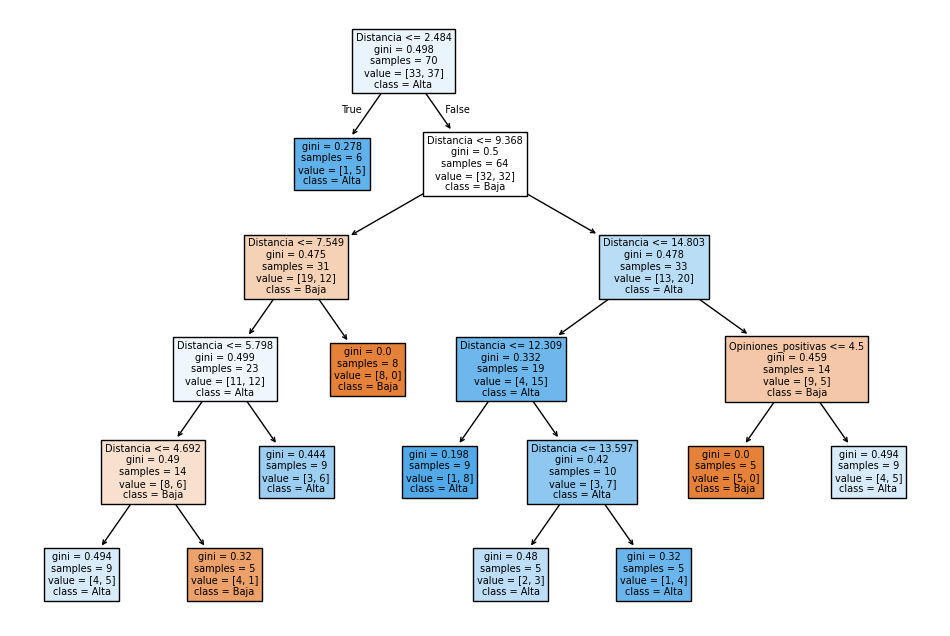

In [9]:
# Graficar el árbol de decisión
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Baja', 'Alta'], filled=True)
plt.show()

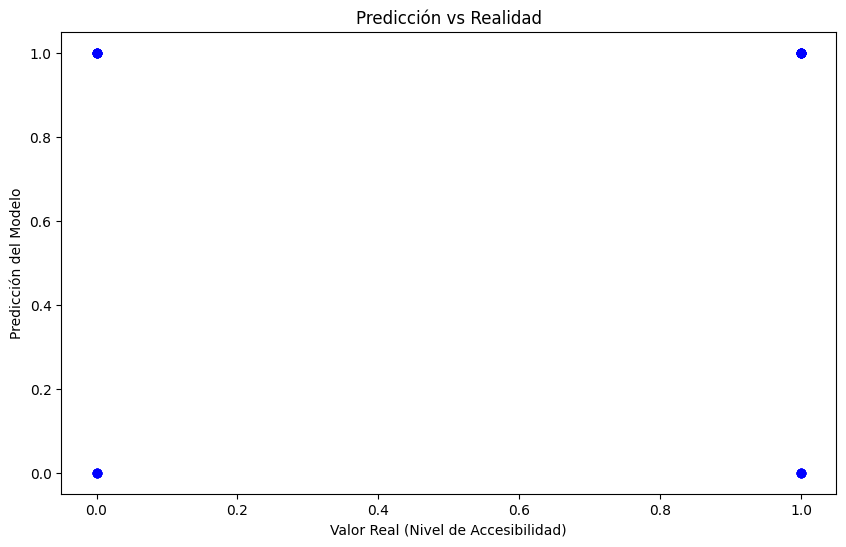

In [10]:
# Graficar la predicción vs. real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Predicción vs Realidad')
plt.xlabel('Valor Real (Nivel de Accesibilidad)')
plt.ylabel('Predicción del Modelo')
plt.show()